<center><h1 style="line-height:200%;color:#0099cc">
Reza Yarmohamadi<br>
Mini Project 2
</h1>

In [1]:
import pandas as pd
import finpy_tse 
import random
import jalali_pandas
import matplotlib.pyplot as plt
import numpy as np

<h2 style="line-height:200%;color:#0099cc">
Part 1
</h2>

In [2]:
### importing monthly cpi index
cpi = pd.read_excel('CPI monthly.xlsx', sheet_name='CPI_شهری')
cpi['year'].fillna(method='ffill', inplace=True)
cpi = cpi[(cpi['year'] >= 1392) | ((cpi['year'] == 1391) & (cpi['month'] == 'اسفند'))]
cpi

,year,month,CPI Index
371,1391.0,اسفند,64.863660
372,1392.0,فروردین,66.954303
373,1392.0,اردیبهشت,67.649834
374,1392.0,خرداد,69.677269
375,1392.0,تیر,71.312562
...,...,...,...
475,1400.0,آبان,368.862665
476,1400.0,آذر,374.868896
477,1400.0,دی,384.071395
478,1400.0,بهمن,391.709999


In [3]:
### cumulative growth of cpi index
cpi_numpy_108_month = (((cpi['CPI Index'].pct_change()+1).cumprod()).values)[1:]
cpi_numpy_9_years = np.array([1])
for i in range(11,108,12):
    cpi_numpy_9_years = np.append(cpi_numpy_9_years, cpi_numpy_108_month[i])
cpi_numpy_9_years

array([1.        , 1.19649472, 1.36658125, 1.48297208, 1.5998493 ,
       1.71711301, 2.51713882, 3.07492346, 4.5460586 , 6.1142902 ])

In [4]:
### importing daily Gold(coin) prices
gold_coin = pd.read_excel('CPI monthly.xlsx', sheet_name='سکه طرح جدید')
gold_coin['j-date'] = gold_coin.date.jalali.to_jalali()
gold_coin['year'] = gold_coin["j-date"].jalali.year
gold_coin

,date,close,high,low,open,j-date,year
0,2007-12-12,1835000,1835000,1835000,1835000,1386-09-21 00:00:00,1386
1,2007-12-13,1835000,1835000,1835000,1835000,1386-09-22 00:00:00,1386
2,2007-12-14,1830000,1830000,1830000,1830000,1386-09-23 00:00:00,1386
3,2007-12-15,1830000,1830000,1830000,1830000,1386-09-24 00:00:00,1386
4,2007-12-16,1840000,1840000,1840000,1840000,1386-09-25 00:00:00,1386
...,...,...,...,...,...,...,...
5240,2022-04-17,133830000,134180000,133150000,134170000,1401-01-28 00:00:00,1401
5241,2022-04-18,132050000,135270000,131600000,134740000,1401-01-29 00:00:00,1401
5242,2022-04-19,130400000,132130000,130400000,131930000,1401-01-30 00:00:00,1401
5243,2022-04-20,131100000,131430000,129900000,129970000,1401-01-31 00:00:00,1401


In [5]:
### 9 year cumulative growth of gold(coin)
gold_numpy_9_years = np.array([1])
for i in range(1392, 1400+1):
    gold_numpy_9_years = np.append(gold_numpy_9_years,(gold_coin[gold_coin.year == i]['close'].pct_change()+1).cumprod().iloc[-1,])
gold_numpy_9_years = np.cumprod(gold_numpy_9_years)
gold_numpy_9_years

array([1.        , 0.70488166, 0.69526627, 0.75073964, 0.8852071 ,
       1.19047381, 3.43057787, 4.43576221, 7.91785026, 9.13054703])

In [6]:
### importing Tepix index (daily)
tepix = pd.read_excel('CPI monthly.xlsx', sheet_name='Tepix')
tepix['j-date'] = tepix.date.jalali.to_jalali()
tepix['year'] = tepix["j-date"].jalali.year
tepix

,date,open,high,low,close,volume,j-date,year
0,1992-06-28,484.90,484.90,484.90,484.90,92291,1371-04-07 00:00:00,1371
1,1992-06-29,484.30,484.30,484.30,484.30,194221,1371-04-08 00:00:00,1371
2,1992-06-30,484.30,484.30,484.30,484.30,67254,1371-04-09 00:00:00,1371
3,1992-07-03,484.34,484.34,484.34,484.34,113238,1371-04-12 00:00:00,1371
4,1992-07-04,484.34,484.34,484.34,484.34,40488,1371-04-13 00:00:00,1371
...,...,...,...,...,...,...,...,...
7204,2022-04-16,1457814.67,1467668.77,1457814.67,1467644.84,7494763045,1401-01-27 00:00:00,1401
7205,2022-04-17,1468096.17,1475057.39,1465595.60,1475058.55,8645131543,1401-01-28 00:00:00,1401
7206,2022-04-18,1478784.07,1503479.35,1478784.07,1501842.63,10668521985,1401-01-29 00:00:00,1401
7207,2022-04-19,1500932.54,1513066.63,1499896.09,1513105.74,8464317027,1401-01-30 00:00:00,1401


In [7]:
### 9 year cumulative growth of Tepix
tepix_numpy_9_years = np.array([1])
for i in range(1392, 1400+1):
    tepix_numpy_9_years = np.append(tepix_numpy_9_years,(tepix[tepix.year == i]['close'].pct_change()+1).cumprod().iloc[-1,])
tepix_numpy_9_years = np.cumprod(tepix_numpy_9_years)
tepix_numpy_9_years

array([ 1.        ,  2.04689321,  1.61992466,  2.06646075,  1.96542086,
        2.44238758,  4.52528417, 12.9525354 , 33.29940027, 34.76630191])

In [8]:
### Tehran Land index (daily)
tehran_land = pd.read_excel('CPI monthly.xlsx', sheet_name='Tehran_land')
tehran_land['j-date'] = tehran_land.date.jalali.to_jalali()
tehran_land['year'] = tehran_land["j-date"].jalali.year
tehran_land

,date,close,high,low,open,j-date,year
0,1991-05-07,475000,475000,475000,475000,1370-02-17 00:00:00,1370
1,1991-05-08,475000,475000,475000,475000,1370-02-18 00:00:00,1370
2,1991-05-09,475000,475000,475000,475000,1370-02-19 00:00:00,1370
3,1991-05-10,475000,475000,475000,475000,1370-02-20 00:00:00,1370
4,1991-05-11,475000,475000,475000,475000,1370-02-21 00:00:00,1370
...,...,...,...,...,...,...,...
11259,2022-03-04,330562000,330562000,330562000,330562000,1400-12-13 00:00:00,1400
11260,2022-03-05,330562000,330562000,330562000,330562000,1400-12-14 00:00:00,1400
11261,2022-03-06,330562000,330562000,330562000,330562000,1400-12-15 00:00:00,1400
11262,2022-03-07,330562000,330562000,330562000,330562000,1400-12-16 00:00:00,1400


In [9]:
### 9 year cumulative growth of Tehran land
tehranland_numpy_9_years = np.array([1])
for i in range(1392, 1400+1):
    tehranland_numpy_9_years = np.append(tehranland_numpy_9_years,(tehran_land[tehran_land.year == i]['close'].pct_change()+1).cumprod().iloc[-1,])
tehranland_numpy_9_years = np.cumprod(tehranland_numpy_9_years)
tehranland_numpy_9_years

array([1.        , 1.04546383, 1.00502406, 1.01451588, 1.10231069,
       1.34850647, 2.44046004, 3.52511711, 7.41273333, 8.59910072])

In [10]:
### Dollar (daily)
dollar = pd.read_excel('CPI monthly.xlsx', sheet_name='Dollar')
dollar['j-date'] = dollar.date.jalali.to_jalali()
dollar['year'] = dollar["j-date"].jalali.year
dollar

,date,close,high,low,open,j-date,year
0,1979-03-19,100,100,100,100,1357-12-28 00:00:00,1357
1,1979-03-20,100,100,100,100,1357-12-29 00:00:00,1357
2,1979-03-21,100,100,100,100,1358-01-01 00:00:00,1358
3,1979-03-22,100,100,100,100,1358-01-02 00:00:00,1358
4,1979-03-23,100,100,100,100,1358-01-03 00:00:00,1358
...,...,...,...,...,...,...,...
15735,2022-04-17,278940,280800,278600,278710,1401-01-28 00:00:00,1401
15736,2022-04-18,276640,279900,276000,278460,1401-01-29 00:00:00,1401
15737,2022-04-19,275720,278090,275510,276520,1401-01-30 00:00:00,1401
15738,2022-04-20,277350,278200,275500,275620,1401-01-31 00:00:00,1401


In [11]:
### 9 year cumulative growth of Dollar
dollar_numpy_9_years = np.array([1])
for i in range(1392, 1400+1):
    dollar_numpy_9_years = np.append(dollar_numpy_9_years,(dollar[dollar.year == i]['close'].pct_change()+1).cumprod().iloc[-1,])
dollar_numpy_9_years = np.cumprod(dollar_numpy_9_years)
dollar_numpy_9_years

array([1.        , 0.88529412, 0.96294118, 1.02088235, 1.10235294,
       1.44088235, 3.79235294, 4.38323529, 7.04558824, 7.71470588])

In [12]:
part1_df = pd.DataFrame(index=[x for x in range(1391, 1400+1)], columns={"CPI", "Gold(coin)", "Tepix", "Tehran_Land", "Dollar"})
part1_df.CPI = cpi_numpy_9_years
part1_df['Gold(coin)'] = gold_numpy_9_years
part1_df.Tepix = tepix_numpy_9_years
part1_df.Tehran_Land = tehranland_numpy_9_years
part1_df.Dollar = dollar_numpy_9_years
part1_df

,Dollar,Gold(coin),Tepix,Tehran_Land,CPI
1391,1.000000,1.000000,1.000000,1.000000,1.000000
1392,0.885294,0.704882,2.046893,1.045464,1.196495
1393,0.962941,0.695266,1.619925,1.005024,1.366581
1394,1.020882,0.750740,2.066461,1.014516,1.482972
1395,1.102353,0.885207,1.965421,1.102311,1.599849
1396,1.440882,1.190474,2.442388,1.348506,1.717113
1397,3.792353,3.430578,4.525284,2.440460,2.517139
1398,4.383235,4.435762,12.952535,3.525117,3.074923
1399,7.045588,7.917850,33.299400,7.412733,4.546059
1400,7.714706,9.130547,34.766302,8.599101,6.114290


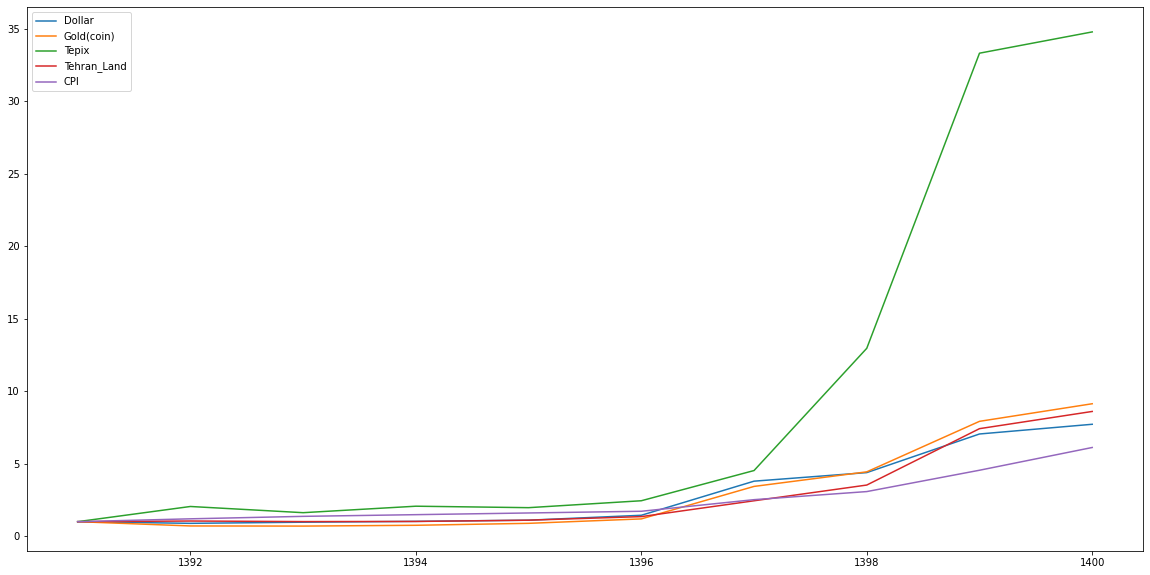

In [13]:
part1_df.plot(figsize=(20,10));


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بازدهی بالاتر دارایی های ریسکی در مدت طولانی تر. درواقع اگر افق زمانی بلند مدت باشد سرمایه گذاری در دارایی ریسکی بهتر است.
</font>
</p>



<h2 style="line-height:200%;color:#0099cc">
Part 2
</h2>

In [14]:
### stocks with more than 8 years history (I did it by another code which is not included here, because of severe time consuming(30 minutes))
stocks = ['آسیا',
 'اخابر',
 'البرز',
 'بالبر',
 'بترانس',
 'بسویچ',
 'بشهاب',
 'بکاب',
 'بکام',
 'بموتو',
 'بنیرو',
 'پارسان',
 'پارسیان',
 'پاسا',
 'پتایر',
 'پترول',
 'پدرخش',
 'پردیس',
 'پسهند',
 'پکرمان',
 'پکویر',
 'پلاسک',
 'تایرا',
 'تپمپی',
 'تکشا',
 'تکمبا',
 'تکنو',
 'ثاباد',
 'ثاخت',
 'ثامان',
 'ثشاهد',
 'ثشرق',
 'ثفارس',
 'ثمسکن',
 'ثنوسا',
 'چافست',
 'چفیبر',
 'چکارن',
 'چکاوه',
 'حپترو',
 'حتاید',
 'حتوکا',
 'حفارس',
 'حفاری',
 'حکشتی',
 'خاذین',
 'خاهن',
 'خبهمن',
 'خپارس',
 'خپویش',
 'ختراک',
 'ختور',
 'ختوقا',
 'خچرخش',
 'خریخت',
 'خرینگ',
 'خزامیا',
 'خزر',
 'خساپا',
 'خشرق',
 'خفنر',
 'خکار',
 'خکمک',
 'خگستر',
 'خلنت',
 'خمحرکه',
 'خمحور',
 'خمهر',
 'خموتور',
 'خنصیر',
 'خودرو',
 'خوساز',
 'دابور',
 'دارو',
 'داسوه',
 'دالبر',
 'دامین',
 'دانا',
 'دپارس',
 'دتماد',
 'دجابر',
 'ددام',
 'درازک',
 'دروز',
 'دزهراوی',
 'دسبحا',
 'دسینا',
 'دشیمی',
 'دعبید',
 'دفارا',
 'دفرا',
 'دکوثر',
 'دکیمی',
 'دلر',
 'دلقما',
 'دیران',
 'ذوب',
 'رانفور',
 'رتاپ',
 'رتکو',
 'رکیش',
 'رمپنا',
 'زمگسا',
 'ساراب',
 'ساربیل',
 'ساروم',
 'سبجنو',
 'سبهان',
 'سپاها',
 'ستران',
 'سخاش',
 'سخزر',
 'سدشت',
 'سدور',
 'سرود',
 'سشرق',
 'سشمال',
 'سصفها',
 'سصوفی',
 'سغرب',
 'سفار',
 'سفارس',
 'سفانو',
 'سقاین',
 'سکرد',
 'سکرما',
 'سمازن',
 'سنیر',
 'سهرمز',
 'سهگمت',
 'سیستم',
 'سیلام',
 'شاراک',
 'شاملا',
 'شبریز',
 'شبندر',
 'شبهرن',
 'شپارس',
 'شپاکسا',
 'شپدیس',
 'شپنا',
 'شتران',
 'شخارک',
 'شدوص',
 'شسینا',
 'شفارس',
 'شفن',
 'شکربن',
 'شکلر',
 'شگل',
 'شلعاب',
 'شنفت',
 'شیراز',
 'شیران',
 'غاذر',
 'غالبر',
 'غبشهر',
 'غبهنوش',
 'غپاک',
 'غپینو',
 'غچین',
 'غدام',
 'غدشت',
 'غسالم',
 'غشاذر',
 'غشان',
 'غشصفا',
 'غشهد',
 'غگرجی',
 'غگل',
 'غمارگ',
 'غمهرا',
 'غنوش',
 'فاذر',
 'فاراک',
 'فاسمین',
 'فاما',
 'فایرا',
 'فباهنر',
 'فپنتا',
 'فجام',
 'فجر',
 'فخاس',
 'فخوز',
 'فرآور',
 'فروس',
 'فسپا',
 'فسرب',
 'فلامی',
 'فلوله',
 'فمراد',
 'فملی',
 'فنوال',
 'فنورد',
 'فولاد',
 'فولاژ',
 'قپیرا',
 'قثابت',
 'قزوین',
 'قشکر',
 'قشهد',
 'قصفها',
 'قلرست',
 'قمرو',
 'قنیشا',
 'قهکمت',
 'کاذر',
 'کاما',
 'کبافق',
 'کپارس',
 'کپشیر',
 'کترام',
 'کچاد',
 'کحافظ',
 'کخاک',
 'کدما',
 'کرازی',
 'کرماشا',
 'کروی',
 'کساپا',
 'کساوه',
 'کسرا',
 'کسرام',
 'کسعدی',
 'کطبس',
 'کفپارس',
 'کفرا',
 'کگاز',
 'کگل',
 'کلوند',
 'کماسه',
 'کمنگنز',
 'کنور',
 'کهمدا',
 'لابسا',
 'لبوتان',
 'لپارس',
 'لخزر',
 'لسرما',
 'مداران',
 'مرقام',
 'ملت',
 'میدکو',
 'نمرینو',
 'همراه',
 'وآذر',
 'واتی',
 'واعتبار',
 'والبر',
 'وامید',
 'وانصار',
 'وایران',
 'وبانک',
 'وبشهر',
 'وبصادر',
 'وبملت',
 'وبهمن',
 'وبوعلی',
 'وبیمه',
 'وپارس',
 'وپاسار',
 'وپترو',
 'وپخش',
 'وپست',
 'وتجارت',
 'وتوس',
 'وتوسم',
 'وتوشه',
 'وتوصا',
 'وتوکا',
 'وخارزم',
 'وخاور',
 'ورنا',
 'وساپا',
 'وساخت',
 'وسپه',
 'وسینا',
 'وصنا',
 'وصندوق',
 'وصنعت',
 'وغدیر',
 'وکار',
 'ولساپا',
 'ولصنم',
 'ولغدر',
 'ولیز',
 'ومعادن',
 'وملی',
 'ونفت',
 'ونوین',
 'ونیرو',
 'ونیکی',
 'افرا',
 'بالاس',
 'بپاس',
 'بساما',
 'پخش',
 'توریل',
 'ثباغ',
 'ثتران',
 'ثعمرا',
 'حکمت',
 'دی',
 'زاگرس',
 'زنگان',
 'سبزوا',
 'سدبیر',
 'سمگا',
 'شاوان',
 'شپاس',
 'شراز',
 'شرانل',
 'غصینو',
 'فزرین',
 'فولای',
 'قچار',
 'قشیر',
 'کرمان',
 'کشرق',
 'کمرجان',
 'مارون',
 'میهن',
 'نوین',
 'ودی',
 'وکوثر',
 'وگستر',
 'شتهران',
 'فن آوا',
 'شکبیر',
 'سجام',
 'شلرد',
 'وشمال',
 'زنجان',
 'نیرو',
 'سنوین',
 'نبروج',
 'تکنار',
 'تمحرکه',
 'حرهشا',
 'سخواف',
 'آرمان',
 'وکادو',
 'بتک',
 'سفارود',
 'تفیرو',
 'سکارون',
 'نتوس',
 'شمواد',
 'وسدید',
 'شرنگی',
 'ولتجار',
 'وزمین',
 'واحیا',
 'خفناور',
 'فوکا',
 'خکاوه',
 'شصفها',
 'فبیرا',
 'خاور',
 'کابگن',
 'فسدید',
 'پشاهن',
 'کقزوی',
 'قجام',
 'قنقش',
 'سمایه',
 'خصدرا',
 'شفارا',
 'کهرام',
 'وگردش',
 'قشرین',
 'کایتا',
 'لخانه',
 'ثاژن',
 'وآفری',
 'شپترو',
 'فالوم',
 'پارتا',
 'شسم',
 'پلوله',
 'تپکو',
 'دتهران\u200c',
 'وآیند',
 'کازرو',
 'دهدشت',
 'بمیلا',
 'معیار',
 'شپلی',
 'وملت']

In [15]:
len(stocks)

389

In [16]:
### 30 random draw from stocks
sample30 = random.sample(stocks, 30)
sample30

['پترول',
 'نمرینو',
 'غصینو',
 'سهرمز',
 'حرهشا',
 'سقاین',
 'سبهان',
 'همراه',
 'وتوسم',
 'شرانل',
 'بکام',
 'پردیس',
 'کپشیر',
 'کهمدا',
 'سپاها',
 'غشصفا',
 'وتوشه',
 'شبهرن',
 'کچاد',
 'غاذر',
 'وآذر',
 'سهگمت',
 'کهرام',
 'خودرو',
 'پاسا',
 'دروز',
 'بپاس',
 'لبوتان',
 'خریخت',
 'فاذر']

In [17]:
### making a dictionary that key is ticker and value is stock history(dataframe)
stocks_dict = {}
for i in sample30:
    s = finpy_tse.Get_Price_History(stock=i, start_date='1392-01-01', end_date='1400-12-28', adjust_price=True, double_date=True)
    s = s.reset_index()
    s["J-Date"] = s["Date"].jalali.to_jalali()
    s['year'] = s["J-Date"].jalali.year
    s['month'] = s["J-Date"].jalali.month
    s['weekday'] = s["J-Date"].jalali.weekday
    stocks_dict[i] = s

stocks_dict
   

{'پترول':                    J-Date       Date  Open  High   Low  Close  Final  \
 0     1392-01-05 00:00:00 2013-03-25  1300  1300  1300   1300   1300   
 1     1392-01-06 00:00:00 2013-03-26  1290  1290  1290   1290   1290   
 2     1392-01-07 00:00:00 2013-03-27  1294  1294  1286   1286   1289   
 3     1392-01-11 00:00:00 2013-03-31  1260  1260  1225   1225   1230   
 4     1392-01-14 00:00:00 2013-04-03  1200  1277  1200   1277   1213   
 ...                   ...        ...   ...   ...   ...    ...    ...   
 2006  1400-12-22 00:00:00 2022-03-13  2130  2180  2088   2121   2126   
 2007  1400-12-23 00:00:00 2022-03-14  2124  2149  2072   2090   2104   
 2008  1400-12-24 00:00:00 2022-03-15  2081  2130  2040   2070   2084   
 2009  1400-12-25 00:00:00 2022-03-16  2070  2139  2070   2100   2100   
 2010  1400-12-28 00:00:00 2022-03-19  2188  2205  2120   2205   2194   
 
         Volume         Value    No  ...                         Name Part  \
 0        50000      65000000     3

In [18]:
stocks_dict[sample30[0]]

,J-Date,Date,Open,High,Low,Close,Final,Volume,Value,No,...,Name,Part,Adj Open,Adj High,Adj Low,Adj Close,Adj Final,year,month,weekday
0,1392-01-05 00:00:00,2013-03-25,1300,1300,1300,1300,1300,50000,65000000,3,...,گروه پتروشیمی س. ایرانیان,3,153,153,153,153,153,1392,1,2
1,1392-01-06 00:00:00,2013-03-26,1290,1290,1290,1290,1290,32000,41280000,6,...,گروه پتروشیمی س. ایرانیان,3,152,152,152,152,152,1392,1,3
2,1392-01-07 00:00:00,2013-03-27,1294,1294,1286,1286,1289,101380,130724680,10,...,گروه پتروشیمی س. ایرانیان,3,152,152,151,151,151,1392,1,4
3,1392-01-11 00:00:00,2013-03-31,1260,1260,1225,1225,1230,70000,86100000,5,...,گروه پتروشیمی س. ایرانیان,3,148,148,144,144,145,1392,1,1
4,1392-01-14 00:00:00,2013-04-03,1200,1277,1200,1277,1213,470000,570050000,28,...,گروه پتروشیمی س. ایرانیان,3,141,150,141,150,143,1392,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,1400-12-22 00:00:00,2022-03-13,2130,2180,2088,2121,2126,70544917,149982521058,3413,...,گ.س.وت.ص.پتروشیمی خلیج فارس,1,2130,2180,2088,2121,2126,1400,12,1
2007,1400-12-23 00:00:00,2022-03-14,2124,2149,2072,2090,2104,58919546,123959014383,2415,...,گ.س.وت.ص.پتروشیمی خلیج فارس,1,2124,2149,2072,2090,2104,1400,12,2
2008,1400-12-24 00:00:00,2022-03-15,2081,2130,2040,2070,2084,53720852,111946785628,2098,...,گ.س.وت.ص.پتروشیمی خلیج فارس,1,2081,2130,2040,2070,2084,1400,12,3
2009,1400-12-25 00:00:00,2022-03-16,2070,2139,2070,2100,2100,53462032,112265307943,2152,...,گ.س.وت.ص.پتروشیمی خلیج فارس,1,2070,2139,2070,2100,2100,1400,12,4


In [19]:
### Time series of trade value 
trade_value_df = pd.DataFrame()
trade_value_df["Date"] = pd.date_range(start='25/03/2013', end='19/03/2022')
trade_value_df["J-Date"] = trade_value_df["Date"].jalali.to_jalali()
trade_value_df["Value"] = 0
for key, value in stocks_dict.items():
    temp_stock = value.copy()
    temp_stock["J-Date"] = temp_stock["Date"].jalali.to_jalali()
    for index, row in temp_stock.iterrows():
        trade_value_df.loc[trade_value_df['J-Date'] == row['J-Date'], ['Value']] += row['Value']


In [20]:
### daily trading value. some days are zero becuase of formal holidays
trade_value_df

,Date,J-Date,Value
0,2013-03-25,1392-01-05 00:00:00,26249755157
1,2013-03-26,1392-01-06 00:00:00,62935641561
2,2013-03-27,1392-01-07 00:00:00,20652777821
3,2013-03-28,1392-01-08 00:00:00,0
4,2013-03-29,1392-01-09 00:00:00,0
...,...,...,...
3277,2022-03-15,1400-12-24 00:00:00,2274039524007
3278,2022-03-16,1400-12-25 00:00:00,1665799391953
3279,2022-03-17,1400-12-26 00:00:00,0
3280,2022-03-18,1400-12-27 00:00:00,0


In [21]:
### removing formal holidays
trade_value_df = trade_value_df[trade_value_df["Value"] != 0]
trade_value_df

,Date,J-Date,Value
0,2013-03-25,1392-01-05 00:00:00,26249755157
1,2013-03-26,1392-01-06 00:00:00,62935641561
2,2013-03-27,1392-01-07 00:00:00,20652777821
5,2013-03-30,1392-01-10 00:00:00,18160642203
6,2013-03-31,1392-01-11 00:00:00,32811500812
...,...,...,...
3275,2022-03-13,1400-12-22 00:00:00,1782279248311
3276,2022-03-14,1400-12-23 00:00:00,1446503344626
3277,2022-03-15,1400-12-24 00:00:00,2274039524007
3278,2022-03-16,1400-12-25 00:00:00,1665799391953


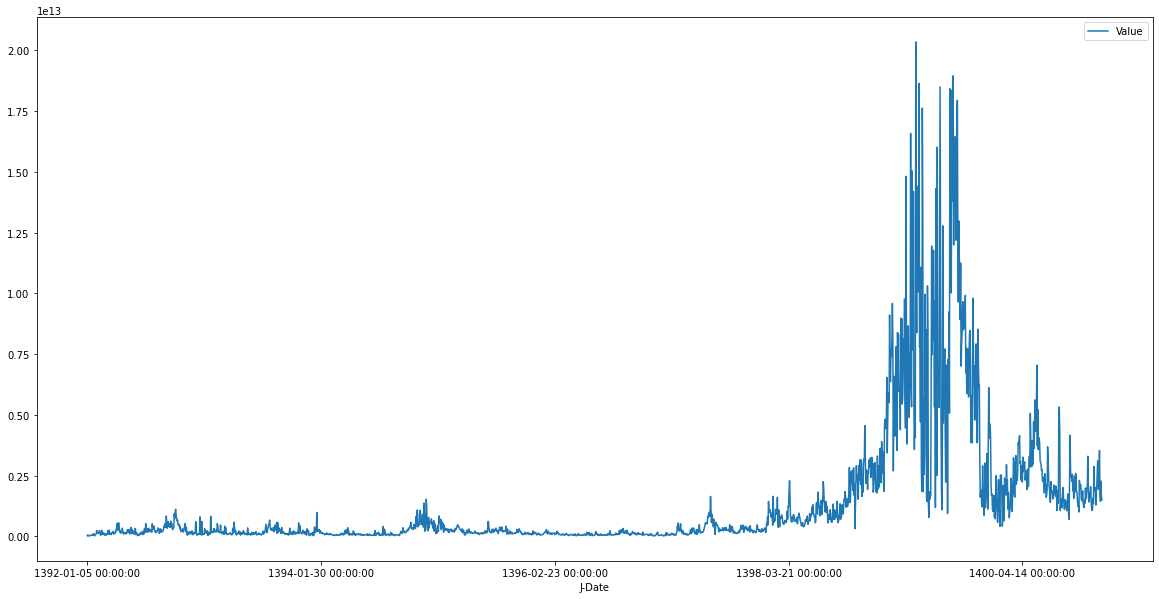

In [22]:
trade_value_df.plot(x='J-Date', y='Value', figsize=(20,10));

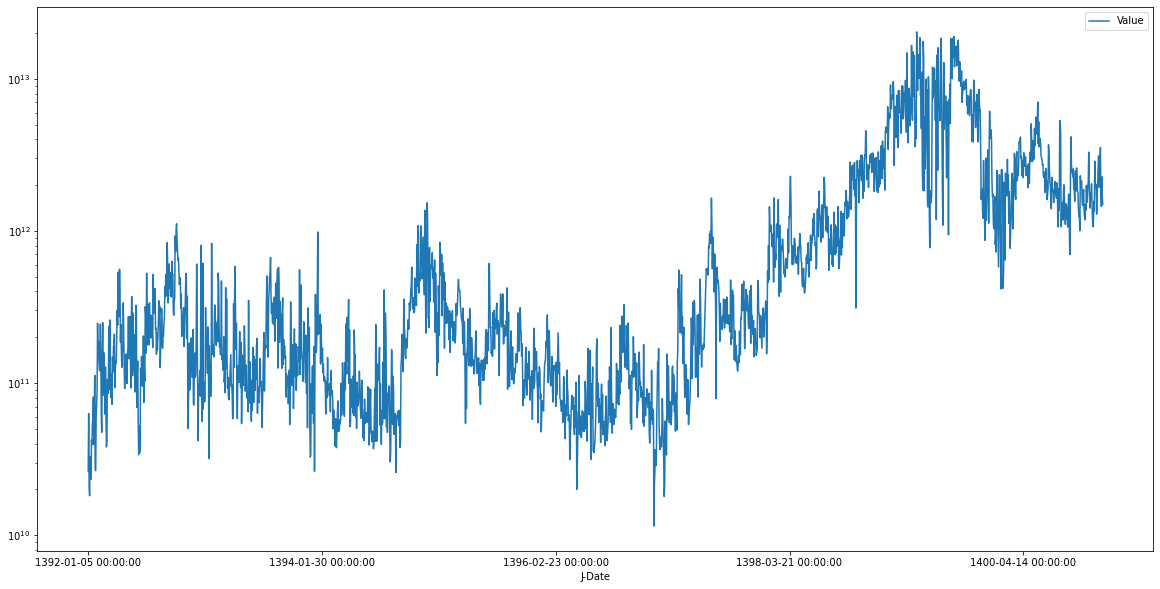

In [23]:
trade_value_df.plot(x='J-Date', y='Value', logy=True, figsize=(20,10));

In [24]:
### yearly return
yearly_return = pd.DataFrame({'year': [x for x in range(1392, 1401)]})
for key, value in stocks_dict.items():
    s = value.copy()
    return_list = []
    for y in range(1392, 1400+1):
        try:
            return_list.append(((s[s.year == y]['Adj Final'].pct_change()+1).cumprod()).iloc[-1]-1)
        except IndexError:
            return_list.append(1)
    yearly_return[key] = return_list


In [25]:
#### 0.95 means +95%
yearly_return

,year,پترول,نمرینو,غصینو,سهرمز,حرهشا,سقاین,سبهان,همراه,وتوسم,...,وآذر,سهگمت,کهرام,خودرو,پاسا,دروز,بپاس,لبوتان,خریخت,فاذر
0,1392,2.052288,4.190109,3.000000,1.118294,0.193011,3.700491,1.994620,0.300163,2.342857,...,1.130996,3.008197,3.103310,1.942857,1.820155,1.471545,1.288889,2.224944,0.576923,2.163265
1,1393,-0.217778,-0.288883,-0.048414,0.022500,-0.332599,-0.263451,-0.141564,0.154135,0.177966,...,0.096483,-0.408956,-0.655020,0.024793,0.143014,-0.005274,0.262136,-0.054231,1.116505,0.050955
2,1394,-0.040189,0.240286,-0.179310,-0.106618,0.756589,-0.572476,-0.469034,0.494028,-0.007194,...,-0.031250,-0.290022,0.372869,0.879032,-0.486278,0.137785,0.348485,0.117239,0.604444,0.736527
3,1395,-0.387255,-0.217135,-0.088710,0.268861,-0.108428,0.600000,0.456305,0.150436,0.215827,...,1.222936,0.237952,0.108471,-0.412556,-0.001833,-0.011178,0.005618,0.055722,-0.227405,-0.382759
4,1396,0.444000,-0.083126,-0.183036,0.167117,1.465862,0.321531,-0.132649,0.392169,0.621302,...,0.071574,-0.333062,-0.036430,0.022059,-0.181166,-0.119642,0.056497,0.515161,-0.315217,-0.076923
5,1397,0.210526,0.520829,1.050562,0.375348,2.057050,1.213261,1.894505,0.237288,0.762774,...,-0.157615,0.857143,0.873719,0.057971,1.216157,0.549786,2.048128,0.629493,1.333333,0.360825
6,1398,1.541096,3.734275,5.142661,2.611930,0.724846,2.120635,3.758962,1.277954,2.552361,...,13.283245,4.556436,4.913894,2.913333,3.992489,4.309548,2.782986,3.874726,3.397671,6.286765
7,1399,2.555033,1.510920,5.330009,1.148072,1.390578,1.485446,2.765268,0.515064,1.561921,...,1.555755,1.352601,3.161422,1.163543,1.408069,1.076428,10.808169,0.442894,0.004751,0.295192
8,1400,-0.426255,-0.169538,-0.505927,-0.353053,0.031860,-0.282830,-0.696904,-0.252829,-0.133910,...,-0.265631,-0.033642,-0.450766,-0.088213,-0.573431,-0.341453,0.598702,-0.297074,0.045230,-0.452482


In [26]:
### Time series of market volume 
market_vol_df = pd.DataFrame()
market_vol_df["Date"] = pd.date_range(start='25/03/2013', end='19/03/2022')
market_vol_df["J-Date"] = market_vol_df["Date"].jalali.to_jalali()
market_vol_df["Volume"] = 0
for key, value in stocks_dict.items():
    temp_stock = value.copy()
    temp_stock["J-Date"] = temp_stock["Date"].jalali.to_jalali()
    for index, row in temp_stock.iterrows():
        market_vol_df.loc[market_vol_df['J-Date'] == row['J-Date'], ['Volume']] += row['Volume']

In [27]:
market_vol_df
### without vacation
market_vol = market_vol_df[market_vol_df["Volume"] != 0]
market_vol

,Date,J-Date,Volume
0,2013-03-25,1392-01-05 00:00:00,3203518
1,2013-03-26,1392-01-06 00:00:00,7035600
2,2013-03-27,1392-01-07 00:00:00,3759393
5,2013-03-30,1392-01-10 00:00:00,3231641
6,2013-03-31,1392-01-11 00:00:00,7177875
...,...,...,...
3275,2022-03-13,1400-12-22 00:00:00,503885334
3276,2022-03-14,1400-12-23 00:00:00,396614952
3277,2022-03-15,1400-12-24 00:00:00,811161795
3278,2022-03-16,1400-12-25 00:00:00,632569430


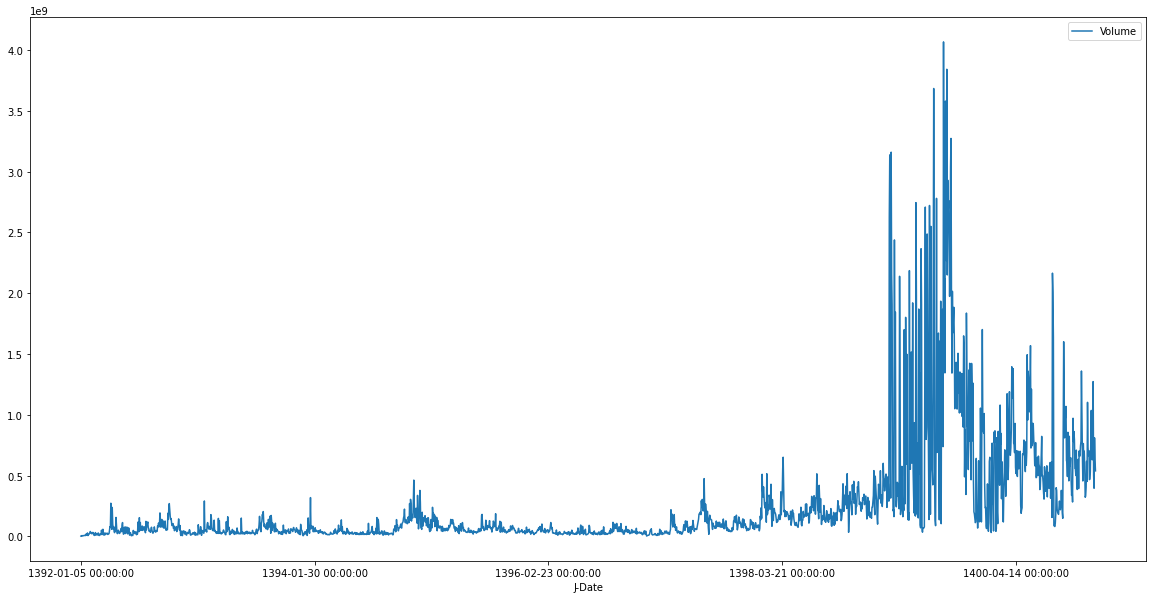

In [28]:
market_vol.plot(x='J-Date', y='Volume', figsize=(20,10));

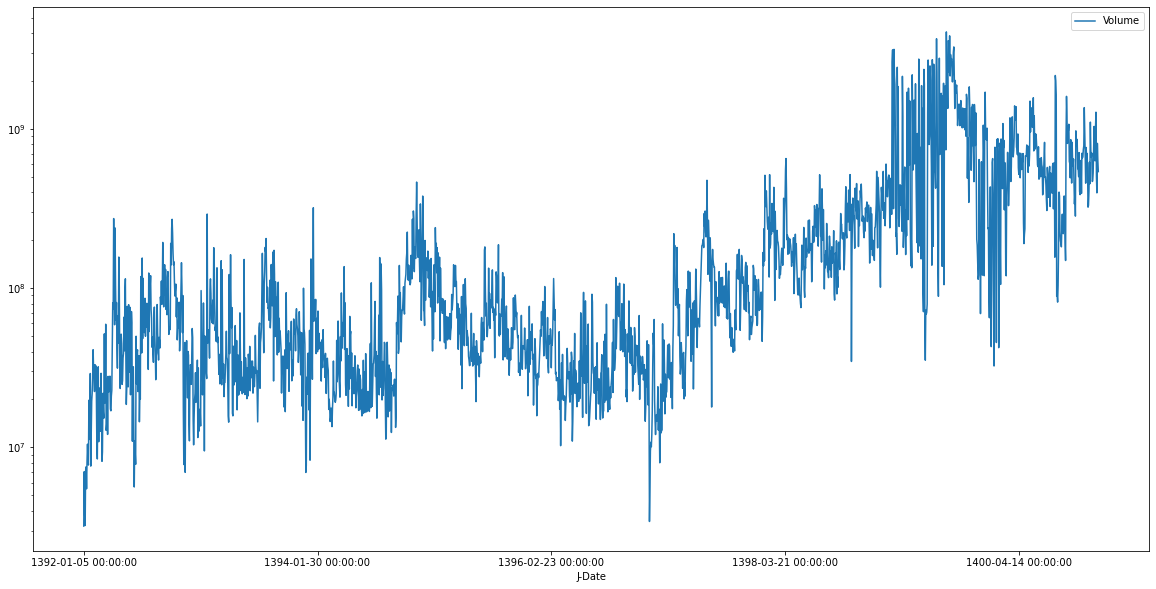

In [29]:
market_vol.plot(x='J-Date', y='Volume', logy=True, figsize=(20,10));

In [30]:
### sum of all shutdowns (without holidays ofcourse)
sum_of_all = 0
for key, value in stocks_dict.items():
    temp_stock = value.copy()
    sum_of_all += (-len(temp_stock) + len(market_vol))
print(sum_of_all)

8786


In [31]:
print("average suspension for each stock is %.f day" %((sum_of_all / 30)/9))   ### 30 stocks and 9 years

average suspension for each stock is 33 day


In [32]:
### monthly return
monthly_return = pd.DataFrame()
for key, value in stocks_dict.items():
    s = value.copy()
    #s['year'] = s["J-Date"].jalali.year
    return_list = []
    for y in range(1392, 1400+1):
        for m in range(1, 12+1):
        #print((s[s.year == y]['Adj Final'].pct_change()+1).cumprod())
            try:
                return_list.append(((s[(s.year == y) & (s.month == m)]['Adj Final'].pct_change()+1).cumprod()).iloc[-1])
            except IndexError:
                return_list.append(1)
    monthly_return[key] = return_list
monthly_return -= 1
monthly_return['mean_stock'] = monthly_return.sum(axis=1) / 30
monthly_return
### -0.03 means -3%

,پترول,نمرینو,غصینو,سهرمز,حرهشا,سقاین,سبهان,همراه,وتوسم,شرانل,...,سهگمت,کهرام,خودرو,پاسا,دروز,بپاس,لبوتان,خریخت,فاذر,mean_stock
0,-0.078431,0.000000,0.013793,0.000000e+00,-0.050000,0.002455,0.056879,0.001631,0.257143,NaN,...,0.244262,0.091274,-0.057143,0.327132,0.002710,0.133333,0.008909,NaN,0.387755,0.099297
1,-0.007092,0.756583,0.006993,2.959049e-01,0.129762,0.000816,0.756541,-0.030060,0.133333,-0.138509,...,0.469737,-0.012556,0.151515,-0.006897,0.004049,0.117647,0.005507,0.000000,-0.138462,0.135299
2,0.000000,0.223138,0.566667,3.014257e-01,-0.097060,NaN,-0.003022,-0.008299,0.039216,0.371925,...,0.247941,0.106061,0.054054,0.172414,0.049731,0.103448,0.122538,0.000000,0.396552,0.158126
3,0.321678,0.029006,0.702479,2.134571e-01,-0.099532,0.423197,0.254138,0.130435,0.230769,0.195485,...,0.164169,0.192248,0.156863,0.125000,0.083120,0.151515,NaN,0.153846,-0.053191,0.220762
4,-0.067708,0.164011,-0.017903,-3.657740e-02,-0.043776,0.367232,0.024679,-0.012868,0.015625,-0.050000,...,0.128571,0.112442,0.238806,0.043956,0.015294,0.077922,0.000000,0.016129,0.318681,0.045463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,-0.041916,-0.151407,0.673425,-1.003876e-01,-0.143748,-0.049884,-0.056931,-0.046030,0.055698,-0.009968,...,0.022203,0.008881,0.227327,-0.174957,-0.304297,0.004776,-0.093107,-0.115276,-0.033367,-0.005009
104,-0.233007,-0.034795,-0.211999,7.575536e-02,-0.009685,-0.176995,-0.157711,-0.051704,0.064984,-0.062383,...,-0.133197,-0.011802,-0.152634,-0.126469,-0.224240,-0.028875,0.055673,-0.130223,0.038043,-0.088601
105,-0.160845,-0.136083,-0.157332,-4.440892e-16,-0.246843,-0.038762,-0.081075,-0.050061,-0.103748,-0.046927,...,0.008954,-0.000169,-0.013265,-0.005331,0.191624,-0.131612,-0.102241,-0.112214,-0.141658,-0.085112
106,-0.110294,0.023674,-0.056285,-4.924779e-03,-0.168073,-0.039800,-0.017251,-0.041184,0.021699,-0.069204,...,0.021781,-0.213883,0.075314,-0.204762,0.073362,0.201717,-0.019198,-0.006542,-0.111372,-0.021682


In [33]:
### cumulative monthly return
cum_monthly_stocks = (monthly_return + 1).cumprod()
cum_monthly_stocks

,پترول,نمرینو,غصینو,سهرمز,حرهشا,سقاین,سبهان,همراه,وتوسم,شرانل,...,سهگمت,کهرام,خودرو,پاسا,دروز,بپاس,لبوتان,خریخت,فاذر,mean_stock
0,0.921569,1.000000,1.013793,1.000000,0.950000,1.002455,1.056879,1.001631,1.257143,NaN,...,1.244262,1.091274,0.942857,1.327132,1.002710,1.133333,1.008909,NaN,1.387755,1.099297
1,0.915033,1.756583,1.020883,1.295905,1.073274,1.003273,1.856452,0.971522,1.424762,0.861491,...,1.828738,1.077572,1.085714,1.317979,1.006770,1.266667,1.014464,1.000000,1.195604,1.248030
2,0.915033,2.148543,1.599383,1.686524,0.969101,NaN,1.850841,0.963460,1.480635,1.181900,...,2.282158,1.191860,1.144402,1.545217,1.056837,1.397701,1.138775,1.000000,1.669723,1.445376
3,1.209379,2.210863,2.722916,2.046524,0.872645,1.427856,2.321211,1.089128,1.822320,1.412944,...,2.656818,1.420992,1.323916,1.738369,1.144682,1.609474,NaN,1.153846,1.580908,1.764461
4,1.127494,2.573469,2.674168,1.971668,0.834445,1.952210,2.378495,1.075114,1.850794,1.342297,...,2.998408,1.580772,1.640074,1.814781,1.162189,1.734888,1.138775,1.172457,2.084714,1.844679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,8.630156,36.459126,132.860331,16.824633,37.788468,20.876114,42.665303,12.856223,72.786518,23.659311,...,29.299918,21.403126,13.857239,15.668820,30.021063,613.781236,44.674066,21.347056,18.449979,75.630938
104,6.619273,35.190516,104.694028,18.099189,37.422484,17.181153,35.936530,12.191506,77.516468,22.183381,...,25.397259,21.150519,11.742154,13.687207,23.289127,596.058177,47.161184,18.567182,19.151880,68.929977
105,5.554597,30.401675,88.222283,18.099189,28.185014,16.515175,33.022958,11.581187,69.474252,21.142375,...,25.624654,21.146939,11.586391,13.614236,27.751891,517.609593,42.339397,16.483689,16.438865,63.063226
106,4.941958,31.121408,83.256676,18.010055,23.447883,15.857868,32.453274,11.104227,70.981764,19.679235,...,26.182786,16.623976,12.459006,10.826559,29.787820,622.020112,41.526563,16.375859,14.608042,61.695875


In [34]:
cpi = pd.read_excel('CPI monthly.xlsx', sheet_name='CPI_شهری')
cpi['year'].fillna(method='ffill', inplace=True)
cpi

,year,month,CPI Index
0,1361.0,فروردین,0.314519
1,1361.0,اردیبهشت,0.209679
2,1361.0,خرداد,0.209679
3,1361.0,تیر,0.209679
4,1361.0,مرداد,0.209679
...,...,...,...
475,1400.0,آبان,368.862665
476,1400.0,آذر,374.868896
477,1400.0,دی,384.071395
478,1400.0,بهمن,391.709999


In [35]:
cpi = cpi[(cpi['year'] >= 1392) | ((cpi['year'] == 1391) & (cpi['month'] == 'اسفند'))]
cpi

,year,month,CPI Index
371,1391.0,اسفند,64.863660
372,1392.0,فروردین,66.954303
373,1392.0,اردیبهشت,67.649834
374,1392.0,خرداد,69.677269
375,1392.0,تیر,71.312562
...,...,...,...
475,1400.0,آبان,368.862665
476,1400.0,آذر,374.868896
477,1400.0,دی,384.071395
478,1400.0,بهمن,391.709999


In [36]:
(((cpi['CPI Index'].pct_change()+1).cumprod()).values)[1:]

array([1.03223136, 1.04295432, 1.07421119, 1.09942243, 1.11923353,
       1.13251811, 1.14881724, 1.16735704, 1.17356444, 1.1872344 ,
       1.18793742, 1.19649472, 1.21370732, 1.22216174, 1.23174203,
       1.26265998, 1.28338641, 1.29331562, 1.31144396, 1.32192752,
       1.34820765, 1.35861203, 1.35888133, 1.36658125, 1.38358029,
       1.38983015, 1.40670767, 1.42390786, 1.43083095, 1.44312412,
       1.45420703, 1.4650987 , 1.48283559, 1.48677246, 1.4804671 ,
       1.48297208, 1.49342423, 1.49517793, 1.50460272, 1.51949757,
       1.5338797 , 1.53905561, 1.54704243, 1.5505126 , 1.56146921,
       1.5742861 , 1.58154638, 1.5998493 , 1.62107449, 1.61976615,
       1.62391874, 1.64188541, 1.6479818 , 1.64904886, 1.67200108,
       1.68863047, 1.70033605, 1.70851666, 1.71396982, 1.71711301,
       1.74008971, 1.75940008, 1.78944041, 1.87245403, 1.96786957,
       2.07240003, 2.21366917, 2.2711669 , 2.32819747, 2.37527414,
       2.42457695, 2.51713882, 2.60940756, 2.65161748, 2.67248

In [37]:
### monthly return of stocks and cpi
### 1.01 means +1% return
cum_monthly_stocks['cpi'] = (((cpi['CPI Index'].pct_change()+1).cumprod()).values)[1:]
cum_monthly_stocks

,پترول,نمرینو,غصینو,سهرمز,حرهشا,سقاین,سبهان,همراه,وتوسم,شرانل,...,کهرام,خودرو,پاسا,دروز,بپاس,لبوتان,خریخت,فاذر,mean_stock,cpi
0,0.921569,1.000000,1.013793,1.000000,0.950000,1.002455,1.056879,1.001631,1.257143,NaN,...,1.091274,0.942857,1.327132,1.002710,1.133333,1.008909,NaN,1.387755,1.099297,1.032231
1,0.915033,1.756583,1.020883,1.295905,1.073274,1.003273,1.856452,0.971522,1.424762,0.861491,...,1.077572,1.085714,1.317979,1.006770,1.266667,1.014464,1.000000,1.195604,1.248030,1.042954
2,0.915033,2.148543,1.599383,1.686524,0.969101,NaN,1.850841,0.963460,1.480635,1.181900,...,1.191860,1.144402,1.545217,1.056837,1.397701,1.138775,1.000000,1.669723,1.445376,1.074211
3,1.209379,2.210863,2.722916,2.046524,0.872645,1.427856,2.321211,1.089128,1.822320,1.412944,...,1.420992,1.323916,1.738369,1.144682,1.609474,NaN,1.153846,1.580908,1.764461,1.099422
4,1.127494,2.573469,2.674168,1.971668,0.834445,1.952210,2.378495,1.075114,1.850794,1.342297,...,1.580772,1.640074,1.814781,1.162189,1.734888,1.138775,1.172457,2.084714,1.844679,1.119234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,8.630156,36.459126,132.860331,16.824633,37.788468,20.876114,42.665303,12.856223,72.786518,23.659311,...,21.403126,13.857239,15.668820,30.021063,613.781236,44.674066,21.347056,18.449979,75.630938,5.686738
104,6.619273,35.190516,104.694028,18.099189,37.422484,17.181153,35.936530,12.191506,77.516468,22.183381,...,21.150519,11.742154,13.687207,23.289127,596.058177,47.161184,18.567182,19.151880,68.929977,5.779336
105,5.554597,30.401675,88.222283,18.099189,28.185014,16.515175,33.022958,11.581187,69.474252,21.142375,...,21.146939,11.586391,13.614236,27.751891,517.609593,42.339397,16.483689,16.438865,63.063226,5.921211
106,4.941958,31.121408,83.256676,18.010055,23.447883,15.857868,32.453274,11.104227,70.981764,19.679235,...,16.623976,12.459006,10.826559,29.787820,622.020112,41.526563,16.375859,14.608042,61.695875,6.038975


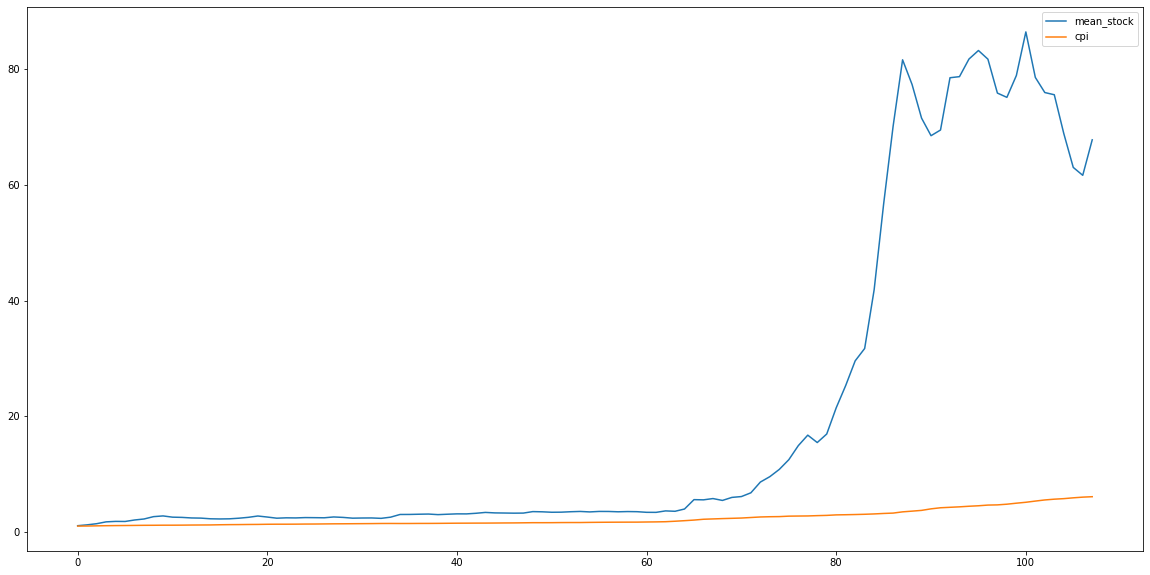

In [38]:
### monthly return of 108 month(9 years)
cum_monthly_stocks.plot(y=["mean_stock", "cpi"], figsize=(20,10));


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
نشون دهنده این است که با استفاده از داریی ریسکی در مدت طولانی میتوان سود خوب و مطمئنی داشت.
</font>
</p>



<h2 style="line-height:200%;color:#0099cc">
Part 3
</h2>

In [39]:
yearly_volatility = pd.DataFrame(index=[x for x in range(1392, 1400+1)])
for key, value in stocks_dict.items():
    s = value.copy()
    temp_daily_return = pd.DataFrame()
    for y in range(1392, 1400+1):
            temp_daily_return = s[s.year == y]['Adj Final'].pct_change()
            temp_daily_return.dropna(inplace=True)
            yearly_volatility.loc[y, key] = (temp_daily_return.std()) * (len(temp_daily_return) ** 0.5)
yearly_volatility.fillna(method='ffill', inplace=True)
yearly_volatility

,پترول,نمرینو,غصینو,سهرمز,حرهشا,سقاین,سبهان,همراه,وتوسم,شرانل,...,وآذر,سهگمت,کهرام,خودرو,پاسا,دروز,بپاس,لبوتان,خریخت,فاذر
1392,0.479010,0.604299,0.553739,0.225337,0.663800,0.889422,0.655941,0.281499,0.388873,0.478402,...,0.308439,0.464289,0.573219,0.596380,0.427430,0.537099,0.291451,1.105339,0.257859,0.527735
1393,0.423708,0.126625,0.424165,0.076535,0.825696,0.411322,0.189979,0.120617,0.193138,0.321790,...,0.417610,0.216946,0.404421,0.368645,0.315550,0.302742,0.121340,0.342407,0.465208,0.430465
1394,0.358837,0.148163,0.398639,0.101561,0.567287,0.519447,0.340166,0.161970,0.180389,0.284304,...,0.163109,0.249501,0.416906,0.400748,0.337194,0.272893,0.201104,0.244659,0.650507,0.393361
1395,0.230869,0.080875,0.369343,0.214963,0.435232,0.668236,0.305353,0.108633,0.131118,0.234047,...,0.411006,0.391823,0.312007,0.370549,0.345523,0.175165,0.224227,0.412760,0.428890,0.300508
1396,0.223557,0.097130,0.451844,0.112949,0.870932,0.185012,0.210063,0.079419,0.162389,0.220298,...,0.181128,0.338900,0.422069,0.292353,0.368282,0.241940,0.240576,0.393563,0.303032,0.197681
1397,0.387707,0.327155,0.707781,0.361964,0.790484,0.484461,0.371226,0.174826,0.324741,0.422818,...,0.195986,0.461161,0.901652,0.434537,0.444566,0.397212,0.246983,0.460011,0.473821,0.376614
1398,0.412636,0.501742,0.558352,0.420437,0.548218,0.548462,0.495381,0.294333,0.340557,0.444326,...,0.573164,0.512788,0.594661,0.448811,0.523030,0.508944,0.272558,0.474461,0.496141,0.482111
1399,1.140496,0.246902,0.496906,0.330599,0.193829,0.347179,0.394330,0.515690,0.529562,0.498513,...,0.530284,0.420974,0.256276,0.618502,0.463350,0.254770,0.395603,0.424995,0.489914,0.501648
1400,0.468495,0.555566,0.420845,0.248851,0.257471,0.348938,0.559142,0.201435,0.296771,0.239803,...,0.433598,0.294806,0.230166,0.423216,0.376839,0.418718,0.273664,0.369429,0.381086,0.366996


In [40]:
### covariance matrix
cov_mat = yearly_return.drop('year', axis=1).cov()
cov_mat


,پترول,نمرینو,غصینو,سهرمز,حرهشا,سقاین,سبهان,همراه,وتوسم,شرانل,...,وآذر,سهگمت,کهرام,خودرو,پاسا,دروز,بپاس,لبوتان,خریخت,فاذر
پترول,1.260906,1.560844,2.437456,0.763465,0.285708,1.215578,1.432099,0.255028,0.993681,0.613612,...,1.952352,1.376190,1.901293,0.935921,1.152819,1.014882,2.885875,0.920086,0.276489,1.188123
نمرینو,1.560844,3.047899,3.286333,1.352141,0.047852,2.175360,2.203705,0.444520,1.686093,0.665413,...,4.827524,2.844767,3.121743,1.786980,2.194633,2.108164,1.750728,2.119285,1.105412,3.010630
غصینو,2.437456,3.286333,5.623491,1.944230,0.525595,2.355655,3.538565,0.688101,2.131445,1.321136,...,6.806414,3.407204,4.428613,2.153089,3.019819,2.806001,6.276693,2.297208,1.338145,3.428190
سهرمز,0.763465,1.352141,1.944230,0.837886,0.123517,0.918859,1.353101,0.324072,0.857044,0.404274,...,3.532497,1.495044,1.717782,0.896921,1.310168,1.287765,1.379321,1.145428,0.755234,1.754890
حرهشا,0.285708,0.047852,0.525595,0.123517,0.666310,0.143846,0.475565,0.102219,0.163129,0.239636,...,-0.001614,0.098346,0.369267,0.061332,0.246084,0.138057,1.161486,0.105014,0.060770,0.051981
سقاین,1.215578,2.175360,2.355655,0.918859,0.143846,1.889199,1.721613,0.226981,1.270950,0.577895,...,2.458035,1.986149,2.158300,1.053466,1.540976,1.286092,1.495617,1.394807,0.503727,1.668311
سبهان,1.432099,2.203705,3.538565,1.353101,0.475565,1.721613,2.552021,0.473903,1.454869,0.847336,...,4.901491,2.436045,2.926214,1.349380,2.222395,1.991601,3.388597,1.708719,1.134800,2.479338
همراه,0.255028,0.444520,0.688101,0.324072,0.102219,0.226981,0.473903,0.170761,0.293129,0.121257,...,1.527213,0.510534,0.638656,0.370597,0.481663,0.521544,0.433899,0.450655,0.345229,0.757240
وتوسم,0.993681,1.686093,2.131445,0.857044,0.163129,1.270950,1.454869,0.293129,1.028521,0.483175,...,3.002516,1.647028,1.889283,0.991966,1.371985,1.269856,1.524950,1.235354,0.639171,1.713428
شرانل,0.613612,0.665413,1.321136,0.404274,0.239636,0.577895,0.847336,0.121257,0.483175,0.369139,...,1.096941,0.688070,0.957223,0.387466,0.645077,0.525732,1.788887,0.422028,0.180423,0.533541


In [41]:
### matrix form of volatility, it's faster :)
def portfolio_volatility(w, a):
    return (w.T @ a @ w) ** 0.5

In [42]:
### risk for number of assets
risk_for_n = pd.DataFrame(columns={'risk':[0]*30}, index=[x for x in range(1,30+1)])
for n in range(1, 30+1):
    sum_risks = 0
    if n == 1:
        summmmmm = 0
        for i in range(30):
            summmmmm += cov_mat.iloc[i,i]
        risk_for_n.iloc[0, 0] = (summmmmm/30)**0.5
        continue      
    for i in range(100):
        random_stocks = random.sample(list(stocks_dict.keys()), n)
        weight = np.repeat(1/n, n)
        cov_matr = cov_mat.loc[random_stocks, random_stocks]
        sum_risks += portfolio_volatility(weight, cov_matr)
    ave_risk = sum_risks / 100
    risk_for_n.iloc[n-1, 0] = ave_risk
    

risk_for_n


,risk
1,2.023067
2,1.446893
3,1.432544
4,1.526643
5,1.588862
6,1.514133
7,1.43169
8,1.436324
9,1.466448
10,1.448102


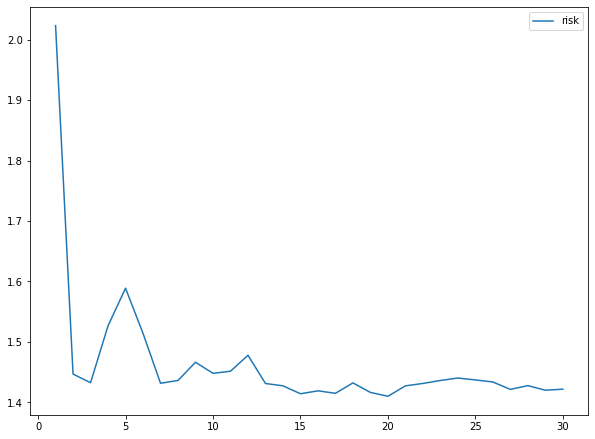

In [43]:
risk_for_n.plot(figsize=(10,7.5));

<h2 style="line-height:200%;color:#0099cc">
Part 4
</h2>

In [44]:
### matrix form of return
def portfolio_return(w, r):
    return w.T @ r

In [45]:
### random portfolio with maximum -1 to 1 for each asset and ofcourse sum of 1 for all.
### 10,000 portfolio sample
risk_return = pd.DataFrame(columns={"Weights":[], "Risk":[], "Return":[]}, index=[x for x in range(10**4)])
for i in range(10**4):
    w = np.random.uniform(low=-1,high=1,size=30)
    ret = portfolio_return(w, (yearly_return.drop('year', axis=1)).mean())
    risk = portfolio_volatility(w, cov_mat)
    risk_return.iloc[i,0] = w
    risk_return.iloc[i,1] = risk
    risk_return.iloc[i,2] = ret
risk_return

,Weights,Risk,Return
0,"[0.5574823729526974, -0.623620497524012, -0.23...",1.996052,-0.051238
1,"[0.4474751249035789, -0.8432384241997337, -0.7...",1.419956,-0.35894
2,"[-0.04877466741316594, 0.6059600451763212, 0.4...",5.079423,2.304556
3,"[-0.10571041157877703, -0.30198034350576974, 0...",9.188775,5.869143
4,"[0.43024944139921417, 0.3529502416424073, 0.60...",3.902336,-1.557805
...,...,...,...
9995,"[0.8963642878293161, 0.7757857728782687, -0.16...",1.696596,-1.515736
9996,"[-0.24682140198745217, 0.8977260295465543, -0....",9.415806,-3.883042
9997,"[-0.5270584516771581, 0.29770062006067155, 0.9...",3.295857,1.276554
9998,"[0.27591643674627475, 0.6628305199162694, -0.7...",4.356948,1.322466


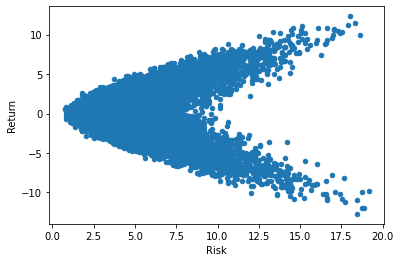

In [46]:
### 1 means +100%
risk_return.plot.scatter(x='Risk', y='Return');

In [47]:
### Maxium Sharpe Ratio
### risk free = 0.2
risk_return['Sharpe'] = (risk_return.Return - 0.20)/risk_return.Risk
risk_return

,Weights,Risk,Return,Sharpe
0,"[0.5574823729526974, -0.623620497524012, -0.23...",1.996052,-0.051238,-0.125868
1,"[0.4474751249035789, -0.8432384241997337, -0.7...",1.419956,-0.35894,-0.393632
2,"[-0.04877466741316594, 0.6059600451763212, 0.4...",5.079423,2.304556,0.41433
3,"[-0.10571041157877703, -0.30198034350576974, 0...",9.188775,5.869143,0.616964
4,"[0.43024944139921417, 0.3529502416424073, 0.60...",3.902336,-1.557805,-0.450449
...,...,...,...,...
9995,"[0.8963642878293161, 0.7757857728782687, -0.16...",1.696596,-1.515736,-1.011282
9996,"[-0.24682140198745217, 0.8977260295465543, -0....",9.415806,-3.883042,-0.433637
9997,"[-0.5270584516771581, 0.29770062006067155, 0.9...",3.295857,1.276554,0.326639
9998,"[0.27591643674627475, 0.6628305199162694, -0.7...",4.356948,1.322466,0.257627


In [48]:
### index of max sharpe
(risk_return['Sharpe'].astype(float)).idxmax()

3339

In [49]:
msr = risk_return.iloc[(risk_return['Sharpe'].astype(float)).idxmax()]
msr

Weights    [-0.6526971729537696, 0.2850909203403551, -0.8...
Risk                                                1.776688
Return                                              2.549164
Sharpe                                              1.322215
Name: 3339, dtype: object

In [50]:
def msr_portfolio():
    counter = 0
    print('Maximum Sharpe Ratio Portfolio is:')
    for key, value in stocks_dict.items():
        print("%.2f" % (msr.Weights[counter]) ,key)
        counter += 1
        
msr_portfolio()

Maximum Sharpe Ratio Portfolio is:
-0.65 پترول
0.29 نمرینو
-0.90 غصینو
-0.46 سهرمز
0.85 حرهشا
-0.59 سقاین
-0.60 سبهان
-0.28 همراه
-0.23 وتوسم
0.11 شرانل
-0.91 بکام
-0.70 پردیس
-0.59 کپشیر
0.97 کهمدا
-0.05 سپاها
-0.08 غشصفا
0.80 وتوشه
0.34 شبهرن
0.26 کچاد
0.85 غاذر
0.55 وآذر
0.60 سهگمت
0.51 کهرام
0.75 خودرو
0.58 پاسا
0.29 دروز
0.46 بپاس
0.20 لبوتان
0.55 خریخت
-0.11 فاذر


In [51]:
### maximum utility
alpha = (msr.Return - 0.2) / (10 * msr.Risk ** 2)
alpha
print("Invest {:.2f} of your money in risky portfolio and {:.2f} in risk free".format(alpha, 1-alpha))

Invest 0.07 of your money in risky portfolio and 0.93 in risk free


<h2 style="line-height:200%;color:#0099cc">
Part 5
</h2>

For 1400

In [52]:
risk_return = pd.DataFrame(columns={"Weights":[], "Risk":[], "Return":[]}, index=[x for x in range(10**4)])
for i in range(10**4):
    w = np.random.uniform(low=-1,high=1,size=30)
    ret = portfolio_return(w, (yearly_return[yearly_return['year'] == 1400].drop('year', axis=1).T))
    risk = portfolio_volatility(w, cov_mat)
    risk_return.iloc[i,0] = w
    risk_return.iloc[i,1] = risk
    risk_return.iloc[i,2] = ret
risk_return.Return = (risk_return.Return).astype(float)
risk_return

,Weights,Risk,Return
0,"[0.030484008741051616, 0.6665948300230053, -0....",1.905971,0.443007
1,"[-0.403385071739393, -0.5084454757650199, -0.0...",3.979871,-0.498297
2,"[0.8386164529814666, 0.5321989276463408, 0.110...",6.081606,0.326024
3,"[-0.42564120679175343, -0.9811657612073752, -0...",4.640084,-1.436361
4,"[-0.41128792431459993, 0.33097030022090945, 0....",6.953441,0.676804
...,...,...,...
9995,"[0.6906477138257787, -0.7897374950280918, -0.9...",1.490151,1.746891
9996,"[-0.9210029545352509, 0.7128261906723243, -0.1...",5.324776,2.002640
9997,"[-0.5129178896653446, -0.19870549829771877, -0...",7.294507,0.842361
9998,"[-0.7736461000018691, -0.07067798573191508, -0...",4.877672,-1.991765


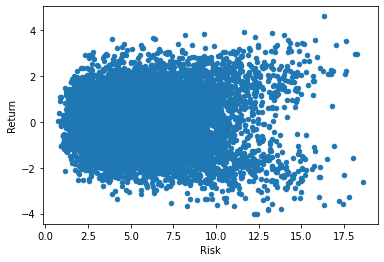

In [53]:
risk_return.plot.scatter(x='Risk', y='Return');

In [54]:
risk_return['Sharpe'] = (risk_return.Return - 0.20)/risk_return.Risk
msr = risk_return.iloc[(risk_return['Sharpe'].astype(float)).idxmax()]
alpha = (msr.Return - 0.2) / (10 * msr.Risk ** 2)
print("Invest {:.2f} of your money in risky portfolio and {:.2f} in risk free in 1400".format(alpha, 1-alpha))

Invest 0.05 of your money in risky portfolio and 0.95 in risk free in 1400


For 1399

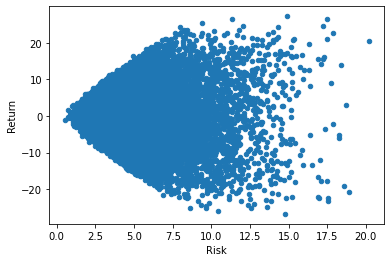

In [55]:
risk_return = pd.DataFrame(columns={"Weights":[], "Risk":[], "Return":[]}, index=[x for x in range(10**4)])
for i in range(10**4):
    w = np.random.uniform(low=-1,high=1,size=30)
    ret = portfolio_return(w, (yearly_return[yearly_return['year'] == 1399].drop('year', axis=1).T))
    risk = portfolio_volatility(w, cov_mat)
    risk_return.iloc[i,0] = w
    risk_return.iloc[i,1] = risk
    risk_return.iloc[i,2] = ret
risk_return.Return = (risk_return.Return).astype(float)
risk_return.plot.scatter(x='Risk', y='Return');

In [56]:
risk_return['Sharpe'] = (risk_return.Return - 0.20)/risk_return.Risk
msr = risk_return.iloc[(risk_return['Sharpe'].astype(float)).idxmax()]
alpha = (msr.Return - 0.2) / (10 * msr.Risk ** 2)
print("Invest {:.2f} of your money in risky portfolio and {:.2f} in risk free in 1399".format(alpha, 1-alpha))

Invest 0.10 of your money in risky portfolio and 0.90 in risk free in 1399


For 1398

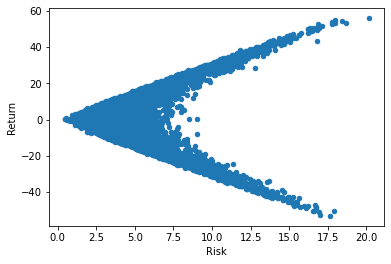

In [57]:
risk_return = pd.DataFrame(columns={"Weights":[], "Risk":[], "Return":[]}, index=[x for x in range(10**4)])
for i in range(10**4):
    w = np.random.uniform(low=-1,high=1,size=30)
    ret = portfolio_return(w, (yearly_return[yearly_return['year'] == 1398].drop('year', axis=1).T))
    risk = portfolio_volatility(w, cov_mat)
    risk_return.iloc[i,0] = w
    risk_return.iloc[i,1] = risk
    risk_return.iloc[i,2] = ret
risk_return.Return = (risk_return.Return).astype(float)
risk_return.plot.scatter(x='Risk', y='Return');

In [58]:
risk_return['Sharpe'] = (risk_return.Return - 0.20)/risk_return.Risk
msr = risk_return.iloc[(risk_return['Sharpe'].astype(float)).idxmax()]
alpha = (msr.Return - 0.2) / (10 * msr.Risk ** 2)
print("Invest {:.2f} of your money in risky portfolio and {:.2f} in risk free in 1398".format(alpha, 1-alpha))

Invest 0.03 of your money in risky portfolio and 0.97 in risk free in 1398


For 1397

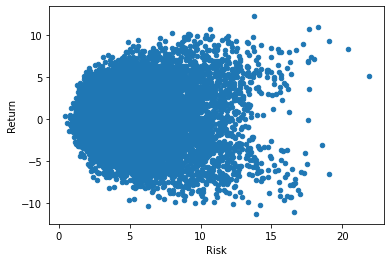

In [59]:
risk_return = pd.DataFrame(columns={"Weights":[], "Risk":[], "Return":[]}, index=[x for x in range(10**4)])
for i in range(10**4):
    w = np.random.uniform(low=-1,high=1,size=30)
    ret = portfolio_return(w, (yearly_return[yearly_return['year'] == 1397].drop('year', axis=1).T))
    risk = portfolio_volatility(w, cov_mat)
    risk_return.iloc[i,0] = w
    risk_return.iloc[i,1] = risk
    risk_return.iloc[i,2] = ret
risk_return.Return = (risk_return.Return).astype(float)
risk_return.plot.scatter(x='Risk', y='Return');

In [60]:
risk_return['Sharpe'] = (risk_return.Return - 0.20)/risk_return.Risk
msr = risk_return.iloc[(risk_return['Sharpe'].astype(float)).idxmax()]
alpha = (msr.Return - 0.2) / (10 * msr.Risk ** 2)
print("Invest {:.2f} of your money in risky portfolio and {:.2f} in risk free in 1397".format(alpha, 1-alpha))

Invest 0.24 of your money in risky portfolio and 0.76 in risk free in 1397


For 1396

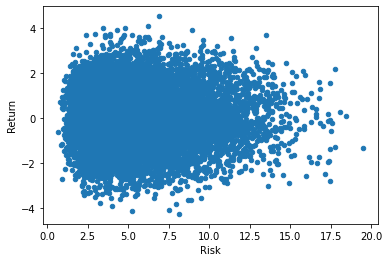

In [61]:
risk_return = pd.DataFrame(columns={"Weights":[], "Risk":[], "Return":[]}, index=[x for x in range(10**4)])
for i in range(10**4):
    w = np.random.uniform(low=-1,high=1,size=30)
    ret = portfolio_return(w, (yearly_return[yearly_return['year'] == 1396].drop('year', axis=1).T))
    risk = portfolio_volatility(w, cov_mat)
    risk_return.iloc[i,0] = w
    risk_return.iloc[i,1] = risk
    risk_return.iloc[i,2] = ret
risk_return.Return = (risk_return.Return).astype(float)
risk_return.plot.scatter(x='Risk', y='Return');

In [62]:
risk_return['Sharpe'] = (risk_return.Return - 0.20)/risk_return.Risk
msr = risk_return.iloc[(risk_return['Sharpe'].astype(float)).idxmax()]
alpha = (msr.Return - 0.2) / (10 * msr.Risk ** 2)
print("Invest {:.2f} of your money in risky portfolio and {:.2f} in risk free in 1396".format(alpha, 1-alpha))

Invest 0.09 of your money in risky portfolio and 0.91 in risk free in 1396



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همونطور که دیدیم پیشنهاد شده برای سال 99 مقدار 30 درصد در سبد ریسکی داشته باشیم و دلیل آن هم رشد زیاد بازار در نیمه اول سال 99 است
</font>
</p>

